Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf

from tensorflow import keras as keras

# import pytorch as torch
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

In [2]:
assert hasattr(tf, "function")  # Be sure to use tensorflow 2.0

Fashion MNIST dataset

In [16]:
from sklearn.preprocessing import StandardScaler

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Get only a subpart of the dataset
train_images = train_images[:10000]
train_labels = train_labels[:10000]

print('dimensions of train_images: ', train_images.shape)
print('dimensions of train_labels: ', train_labels.shape)
# print('train_images: ', train_images[0])


# Reshape the images and convert to float
train_images = train_images.reshape(train_images.shape[0], -1)
train_images = train_images.astype(float)

test_images = test_images.reshape(test_images.shape[0], -1)
test_images = test_images.astype(float)

# Scale the values
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

print('dimensions of train_images: ', train_images.shape)
print('dimensions of train_labels: ', train_labels.shape)
print('train_images: ', train_images[0])




dimensions of train_images:  (10000, 28, 28)
dimensions of train_labels:  (10000,)
train_images:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163

Plot one of the data

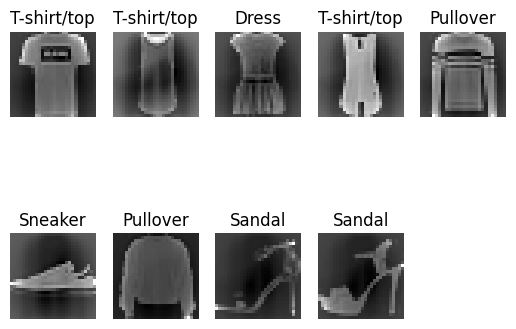

In [15]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range (1,10):
    plt.subplot(2,5,i)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(targets_names[train_labels[i]])
    plt.axis('off')

Create 